# Python 與機器學習（4）

## 郭耀仁

## 機器學習實作

- 認識 Scikit-Learn
- 認識玩具資料集（Toy datasets）
- 感知器學習
- 繪製決策邊界圖

## 認識 Scikit-Learn

- 用來實作資料探勘與機器學習的 Python 套件
- 建構於 NumPy，SciPy 與 Matplotlib 套件之上
- 有[六大功能模組](http://scikit-learn.org/stable/index.html)：
    - 預處理
    - 降維
    - 迴歸
    - 分群
    - 分類
    - 模型評估

## 認識 Scikit-Learn（2）

- [其他的 Scikits](https://scikits.appspot.com/scikits)
- [Scikit-Learn 機器學習地圖](http://scikit-learn.org/stable/tutorial/machine_learning_map/)

## 認識玩具資料集

- [boston 資料集](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston)
- [iris 資料集](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris)
- [digits 資料集](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits)
- [MNIST 資料集](http://yann.lecun.com/exdb/mnist/)

## 認識玩具資料集（2）

- [boston 資料集](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston)

```python
from sklearn.datasets import load_boston

boston = load_boston()
print(boston.DESCR)
print(boston.target)
print(boston.data)
```

## 認識玩具資料集（3）

- [iris 資料集](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris)

```python
from sklearn.datasets import load_iris

iris = load_iris()
print(iris.DESCR)
print(iris.target)
print(iris.data)
print(iris.target_names)
```

## 認識玩具資料集（4）

- [digits 資料集](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits)

```python
from sklearn.datasets import load_digits

digits = load_digits()
print(digits.DESCR)
print(digits.images.shape)
```

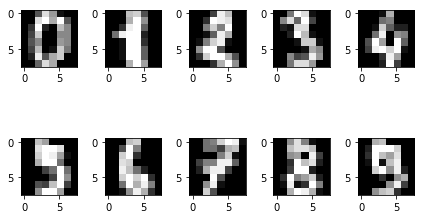

In [1]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

digits = load_digits()
plt.subplots(2, 5)
for i, k in enumerate(range(1, 11)):
    plt.subplot(2, 5, k)
    plt.imshow(digits.images[i], cmap = "gray")

plt.tight_layout()
plt.show()

## 認識玩具資料集（5）

- [MNIST 資料集](http://yann.lecun.com/exdb/mnist/)
- 用 tensorflow 讀入是我覺得最方便的方式

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
import numpy as np

mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


(55000, 784)


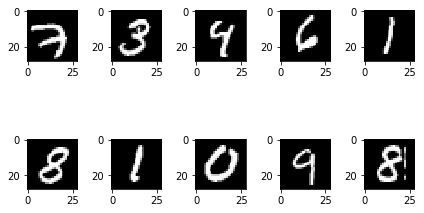

In [4]:
x_train = mnist.train.images
print(x_train.shape)
x_train_reshaped = np.reshape(x_train, (55000, 28, 28))
for i, k in enumerate(range(1, 11)):
    plt.subplot(2, 5, k)
    plt.imshow(x_train_reshaped[i], cmap = "gray")

plt.tight_layout()
plt.show()

## 感知器學習

- 沒有經過 sigmoid 函數轉換的簡單分類器
- 其中 $\theta_0x_0$ 即為門檻值
- $\phi$ 函數就像是一個簡單版的 sign 函數

$$h(x) = \theta_0x_0 + \theta_1x_1 + ... + \theta_mx_m = \theta^Tx$$


$$
    \hat{y} = \phi(h(x)) =
    \begin{cases}
        1       & \quad \text{if } h(x)\geq 0\\
    0  & \quad \text{ohterwise.}\\
    \end{cases}
$$

## 感知器學習（2）

- 初始一個很小趨近於零的值給 $\theta$
- 利用真實答案 $y_i$ 與預測結果 $\hat{y_i}$ 的誤差更新 $\theta$
- $\alpha$ 為學習速率

$$\theta_i:=\theta_i + \Delta \theta_i$$

$$\Delta \theta_i = \alpha(y_i - \hat{y_i})x_i$$

## 感知器學習（3）

- 正確的預測感知器不會修正權重 $\theta$

$$\Delta \theta_i = \alpha (1 - 1)x_i = 0$$
$$\Delta \theta_i = \alpha (0 - 0)x_i = 0$$

- 錯誤的預測會讓感知器修正權重 $\theta$ 藉此修正下一輪的預測結果

$$\Delta \theta_i = \alpha (1 - 0)x_i = \alpha (1) x_i$$
$$\Delta \theta_i = \alpha (0 - 1)x_i = \alpha (-1) x_i$$

## 感知器學習（4）

- 修正的方向：
    - $\Delta \theta_i = \alpha (1 - 0)x_i = \alpha (1) x_i$：$\theta$ 增大，更容易達成 $h(x) \geq 0$
    - $\Delta \theta_i = \alpha (0 - 1)x_i = \alpha (-1) x_i$：$\theta$ 增大，更容易達成 $h(x) < 0$

$$
    \hat{y} = \phi(h(x)) =
    \begin{cases}
        1       & \quad \text{if } h(x)\geq 0\\
    0  & \quad \text{ohterwise.}\\
    \end{cases}
$$

In [5]:
# 建立一個 Perceptron 類別
import numpy as np

class Perceptron:
    def __init__(self, alpha, n_epoch):
        self.alpha = alpha
        self.n_epoch = n_epoch
        
    def fit(self, X, y):
        self.thetas = np.zeros(1 + X.shape[1]) # 1 給 theta_0, X.shape[1] 給 theta_1~theta_n
        self.errors = []
        
        for i in range(self.n_epoch):
            error = 0
            for x, target in zip(X, y):
                delta_theta = self.alpha * (target - self.predict(x))
                self.thetas[1:] += delta_theta * x
                self.thetas[0] += delta_theta
                error += (delta_theta != 0) # delta_theta 太小，改以 boolean 判斷
            self.errors.append(error)
        return self
    
    def net_input(self, X):
        return np.dot(self.thetas[1:], X.T) + self.thetas[0]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0, 1, 0) # \phi function is applied here

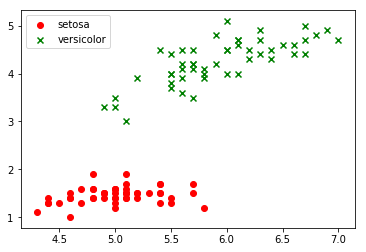

In [6]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data
x1_setosa, x2_setosa = X[:50, 0], X[:50, 2]
x1_versicolor, x2_versicolor = X[50:100, 0], X[50:100, 2]

plt.scatter(x = x1_setosa, y = x2_setosa, marker = "o", color = "red", label = "setosa")
plt.scatter(x = x1_versicolor, y = x2_versicolor, marker = "x", color = "green", label = "versicolor")
plt.legend(loc = "upper left")
plt.show()

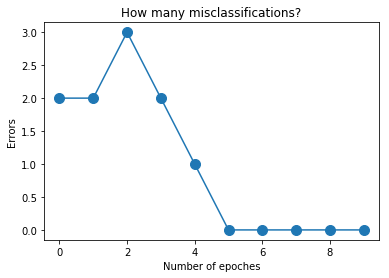

In [7]:
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data[:100, [0, 2]]
y = iris.target[:100]
ppn = Perceptron(alpha = 0.01, n_epoch = 10)
ppn.fit(X, y)
plt.plot(np.arange(len(ppn.errors)), ppn.errors, marker = 'o', markersize = 10)
plt.xlabel("Number of epoches")
plt.ylabel("Errors")
plt.title('How many misclassifications?')
plt.show()

## 繪製決策邊界圖

- 利用繪製等高線圖（填滿）的方法

In [8]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_boundary(X, y, classifier, resolution = 0.02):
    markers = ('o', 'x', '^')
    colors = ('red', 'green', 'blue')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                     np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha = 0.3, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1], c = cmap(idx), marker = markers[idx], label = cl)

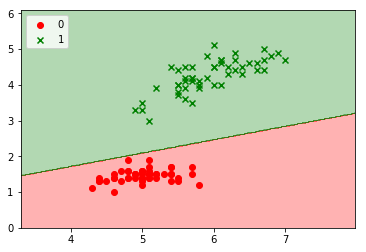

In [9]:
plot_decision_boundary(X, y, classifier = ppn)
plt.legend(loc = "upper left")
plt.show()